# Jonathan Halverson
# Tuesday, February 14, 2018
# Is the number of 311 calls per day in Boston seasonal?

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [204]:
df = pd.read_csv('311.csv', parse_dates=['open_dt'], header=0, low_memory=False)

In [206]:
df.shape

(1191182, 29)

In [207]:
df.head(2).T

,0,1
CASE_ENQUIRY_ID,101002370927,101002370926
open_dt,2018-02-13 23:54:34,2018-02-13 23:41:00
target_dt,2018-02-15 08:30:00,2018-02-28 08:30:00
closed_dt,NaN,NaN
OnTime_Status,ONTIME,ONTIME
CASE_STATUS,Open,Open
CLOSURE_REASON,,
CASE_TITLE,Request for Pothole Repair,PRINTED : robert
SUBJECT,Public Works Department,Public Works Department
REASON,Highway Maintenance,Street Lights


In [208]:
df.tail(2).T

,1191180,1191181
CASE_ENQUIRY_ID,101000295614,101000295613
open_dt,2011-07-01 02:18:31,2011-07-01 01:32:33
target_dt,2011-07-05 02:18:31,2011-07-15 01:32:32
closed_dt,2011-07-01 06:12:43,2011-07-01 05:06:58
OnTime_Status,ONTIME,ONTIME
CASE_STATUS,Closed,Closed
CLOSURE_REASON,Case Closed Case Scheduled Items have been sch...,Case Closed Case Resolved replaced 100 amp fus...
CASE_TITLE,Schedule a Bulk Item Pickup,Street Light Outages
SUBJECT,Public Works Department,Public Works Department
REASON,Sanitation,Street Lights


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191182 entries, 0 to 1191181
Data columns (total 29 columns):
CASE_ENQUIRY_ID                   1191182 non-null int64
open_dt                           1191182 non-null datetime64[ns]
target_dt                         958003 non-null object
closed_dt                         1099109 non-null object
OnTime_Status                     1190509 non-null object
CASE_STATUS                       1191182 non-null object
CLOSURE_REASON                    1191182 non-null object
CASE_TITLE                        1190697 non-null object
SUBJECT                           1191182 non-null object
REASON                            1191182 non-null object
TYPE                              1191182 non-null object
QUEUE                             1191182 non-null object
Department                        1191182 non-null object
SubmittedPhoto                    243770 non-null object
ClosedPhoto                       141659 non-null object
Location     

In [209]:
df = df[['open_dt', 'Longitude', 'Latitude']]
df.head()

,open_dt,Longitude,Latitude
0,2018-02-13 23:54:34,-71.0587,42.3594
1,2018-02-13 23:41:00,-71.1234,42.2599
2,2018-02-13 23:26:28,-71.1126,42.3171
3,2018-02-13 23:26:10,-71.0810,42.3242
4,2018-02-13 23:21:33,-71.0587,42.3594


In [218]:
df['by_day'] = df.open_dt.map(lambda u: (u.year, u.month, u.day))
df['by_weekofyear'] = df.open_dt.apply(lambda u: u.weekofyear)
df['by_weekday'] = df.open_dt.dt.weekday
df['date'] = df.open_dt.dt.date

In [216]:
df.head(25)

,open_dt,Longitude,Latitude,by_day,by_weekofyear,by_weekday
0,2018-02-13 23:54:34,-71.0587,42.3594,"(2018, 2, 13)",7,1
1,2018-02-13 23:41:00,-71.1234,42.2599,"(2018, 2, 13)",7,1
2,2018-02-13 23:26:28,-71.1126,42.3171,"(2018, 2, 13)",7,1
3,2018-02-13 23:26:10,-71.0810,42.3242,"(2018, 2, 13)",7,1
4,2018-02-13 23:21:33,-71.0587,42.3594,"(2018, 2, 13)",7,1
5,2018-02-13 23:17:26,-71.0587,42.3594,"(2018, 2, 13)",7,1
6,2018-02-13 23:08:04,-71.0587,42.3594,"(2018, 2, 13)",7,1
7,2018-02-13 23:07:26,-71.0601,42.3210,"(2018, 2, 13)",7,1
8,2018-02-13 23:00:58,-71.1198,42.2735,"(2018, 2, 13)",7,1
9,2018-02-13 22:49:10,-71.0587,42.3594,"(2018, 2, 13)",7,1


### Recall dates and timestamps

In [140]:
x=df.loc[0, 'open_dt'].date()

In [217]:
df.open_dt.dt.date

0          2018-02-13
1          2018-02-13
2          2018-02-13
3          2018-02-13
4          2018-02-13
5          2018-02-13
6          2018-02-13
7          2018-02-13
8          2018-02-13
9          2018-02-13
10         2018-02-13
11         2018-02-13
12         2018-02-13
13         2018-02-13
14         2018-02-13
15         2018-02-13
16         2018-02-13
17         2018-02-13
18         2018-02-13
19         2018-02-13
20         2018-02-13
21         2018-02-13
22         2018-02-13
23         2018-02-13
24         2018-02-13
25         2018-02-13
26         2018-02-13
27         2018-02-13
28         2018-02-13
29         2018-02-13
              ...    
1191152    2011-07-01
1191153    2011-07-01
1191154    2011-07-01
1191155    2011-07-01
1191156    2011-07-01
1191157    2011-07-01
1191158    2011-07-01
1191159    2011-07-01
1191160    2011-07-01
1191161    2011-07-01
1191162    2011-07-01
1191163    2011-07-01
1191164    2011-07-01
1191165    2011-07-01
1191166   

In [81]:
pd.to_datetime('today')

Timestamp('2018-02-14 00:00:00')

In [121]:
df.loc[0, 'open_dt']

2018

In [119]:
np.datetime64()

ValueError: Converting an integer to a NumPy datetime requires a specified unit

In [82]:
np.datetime64('2005-01-01')

numpy.datetime64('2005-01-01')

In [83]:
np.datetime64(df.iloc[-1, 1])

numpy.datetime64('2011-07-01T01:32:33.000000')

In [157]:
df.iloc[-1, 0].date()

datetime.date(2011, 7, 1)

In [178]:
df.open_dt.index[-1]

1191181

In [203]:
df.open_dt.tail(1)

1191181   2011-07-01 01:32:33
Name: open_dt, dtype: datetime64[ns]

In [175]:
df.open_dt.iloc[-1]

Timestamp('2011-07-01 01:32:33')

In [ ]:
df['days_since'] = (df.open_dt.dt.date - df.iloc[-1, 0].date()) / np.timedelta64(1, 'D')

(-71.196107795698921,
 -70.984192204301067,
 42.219985391528617,
 42.431900982926471)

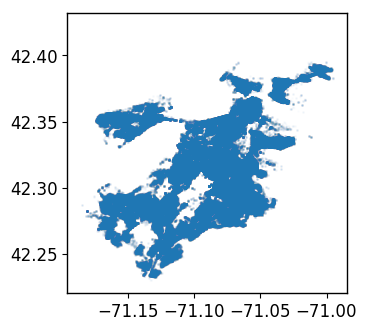

In [52]:
plt.scatter(df.Longitude, df.Latitude, s=1, alpha=0.01)
plt.axis('equal')
plt.axis('square')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

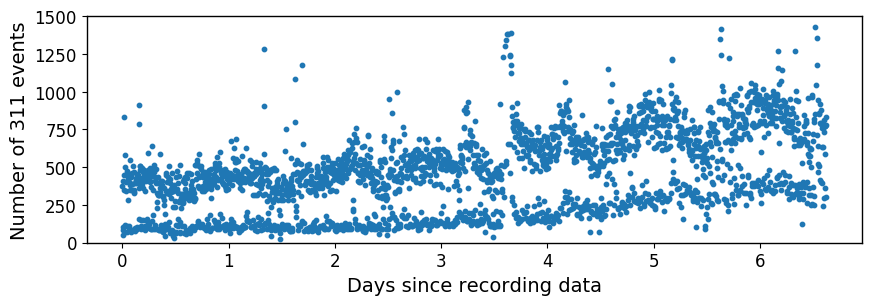

In [57]:
X = df[['by_day', 'open_dt']].groupby('by_day').count().reset_index()
plt.subplots(1, 1, figsize=(10, 3))
plt.scatter(X.index/365.0, X.open_dt, s=10, alpha=1)
plt.ylim(0, 1500)
plt.xlabel('Days since recording data')
plt.ylabel('Number of 311 events')

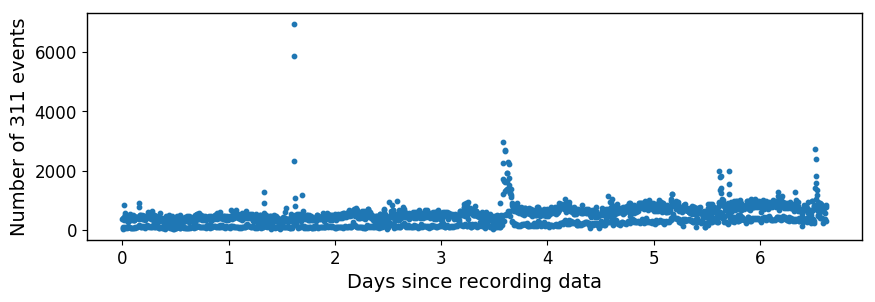

In [84]:
plt.subplots(1, 1, figsize=(10, 3))
plt.scatter(X.index/365.0, X.open_dt, s=10, alpha=1)
#plt.ylim(0, 1500)
plt.xlabel('Days since recording data')
plt.ylabel('Number of 311 events')

In [107]:
df.by_day.value_counts().sort_values(ascending=False).head(10)

(2013, 2, 10)    6962
(2013, 2, 9)     5875
(2015, 1, 28)    2983
(2018, 1, 5)     2719
(2015, 2, 3)     2694
(2015, 2, 4)     2655
(2018, 1, 8)     2402
(2013, 2, 11)    2316
(2015, 2, 16)    2283
(2015, 1, 29)    2272
Name: by_day, dtype: int64

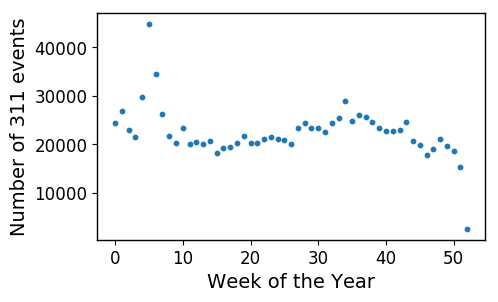

In [104]:
X = df[['by_weekofyear', 'open_dt']].groupby('by_weekofyear').count().reset_index()
plt.subplots(1, 1, figsize=(5, 3))
plt.scatter(X.index, X.open_dt, s=10, alpha=1)
#plt.ylim(0, 1500)
plt.xlabel('Week of the Year')
plt.ylabel('Number of 311 events')

In [102]:
pd.to_datetime('2018-01-01').weekofyear

1

In [101]:
pd.to_datetime('2018-08-01').weekofyear

31

(200, 600)

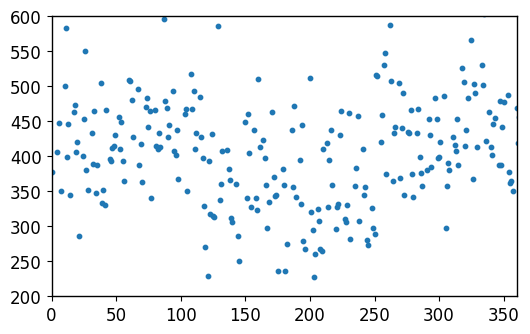

In [45]:
X = df[['by_day', 'open_dt']].groupby('by_day').count().reset_index()
plt.scatter(X.index, X.open_dt, s=10, alpha=1)
plt.xlim(0, 360)
plt.ylim(200, 600)

# FFT on day data